# Q-4, SMAI Assignment-4  (Random Forest vs Boosted Trees)   
In this section, we shall compare the results of Random Forests (a Bagging
technique) with multiple Boosting Techniques over the tasks of classification
and regression specified above.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report
from itertools import product
from sklearn.metrics import mean_squared_error
from itertools import product
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### wine dataset preprocessing

In [3]:
wine_data = pd.read_csv("/content/drive/MyDrive/SMAI_Google colab/WineQT.csv")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
X_data_w = wine_data.drop("Id",axis=1)
print("The shape of the data:",np.array(X_data_w).shape)
X_data_w.columns

The shape of the data: (1143, 12)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Text(0, 0.5, 'Count')

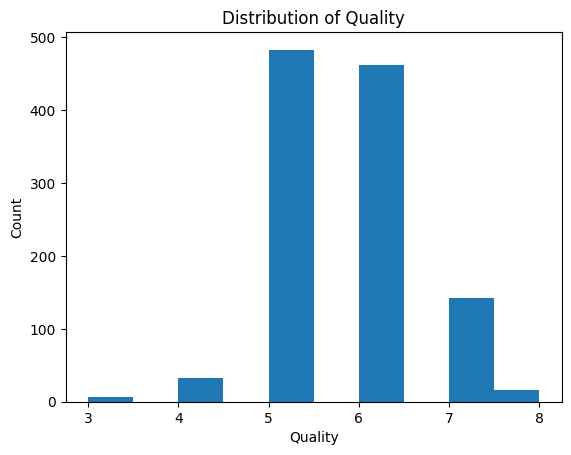

In [ ]:
X_data_w["quality"].sort_index().plot(kind='hist')
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

In [5]:
Y_data_w = X_data_w['quality']

#multi class to binary conversion
Y_data_W_n = []
for i,Y in enumerate(Y_data_w):
  if (Y==3 or Y==4 or Y==5):
    Y_data_W_n.append(0)
  else:
    Y_data_W_n.append(1)
Y_data_w_n = np.array(Y_data_W_n).reshape(len(Y_data_w),-1)

X_data_w_n = X_data_w.drop('quality',axis=1)

# X_data_w_n = preprocessing.normalize(X_data_w_n,axis=0)
# X_data_w_n = std.fit_transform(X=X_data_w_n)

X_train_t, X_test_w, Y_train_t, Y_test_w = train_test_split(X_data_w_n,Y_data_w_n,test_size=0.15,random_state=1)
X_train_w, X_valid_w,Y_train_w, Y_valid_w = train_test_split(X_train_t,Y_train_t,test_size=0.176,random_state=1)

std = preprocessing.StandardScaler()
X_train_w = std.fit_transform(X=X_train_w)
X_test_w = std.fit_transform(X=X_test_w)
X_valid_w = std.fit_transform(X=X_valid_w)

print("Shape of the train, test and validaton data:",X_train_w.shape,X_test_w.shape,X_valid_w.shape)
print("Shape of the train, test and validaton label:",Y_train_w.shape,Y_test_w.shape,Y_valid_w.shape)

Shape of the train, test and validaton data: (800, 11) (172, 11) (171, 11)
Shape of the train, test and validaton label: (800, 1) (172, 1) (171, 1)


## 4.1 Random Forest Classifier Tranning

1. Train a Random Forest Classifier and Regressor along the same lines of
the Bagging exercise (for decision tree) and report the best-performing
hyper-parameters

In [39]:
class random_forest_classifier:
  def __init__(self, n_trees=10, criterion = 'gini',max_depth=10, max_features = 10, min_samples_split=2,random_state=None):
    self.n_trees = n_trees
    self.criterion = criterion
    self.max_depth=max_depth
    self.max_features = max_features
    self.min_samples_split=min_samples_split
    self.random_state = random_state
    self.trees = []

  def fit(self,X,y):
    self.trees = []
    for i in range(self.n_trees):
        tree_ = tree.DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth,
                                           max_features=self.max_features, min_samples_split=self.min_samples_split,
                                           random_state=self.random_state)

        indices = np.random.choice(len(X), size=len(X), replace=True)
        tree_.fit(X[indices], y[indices])
        self.trees.append(tree_)


  def predict(self,X_test):
    test_preds = np.empty((0,1),float)
    pred_is_empty = True
    for tree in self.trees:
      if pred_is_empty == True:
        test_preds = np.append(test_preds,tree.predict(X_test),axis=None)
        pred_is_empty = False
        test_preds = np.array(test_preds).reshape(len(test_preds),-1)
      else:
        test_preds = np.append(test_preds,np.array(tree.predict(X_test)).reshape(len(X_test),-1),axis=1)
    test_preds_sum = np.sum(test_preds,axis=1)
    pred = []
    for s in test_preds_sum:
      if (s>int(self.n_trees/2)):
        pred.append(1)
      else:
        pred.append(0)
    return np.array(pred).reshape(len(test_preds_sum),-1)



In [40]:
random_state = 12
h_param = {
        'n_trees':[7,9,11,13,15,17,19],
        'criterion' : ['gini', 'entropy'],
        'Max_depth' : [3,5,10,20,30],
        'Max_features' : [3,5,7,9,11]
        }
hyper_param = list(product(*h_param.values()))
accuracy = []
for i in hyper_param:
  r_f = random_forest_classifier(n_trees=i[0], criterion = i[1] ,max_depth=i[2], max_features = i[3], random_state=random_state)
  r_f.fit(X_train_w,Y_train_w)
  predicted_value = r_f.predict(X_valid_w)
  acc = np.sum(predicted_value==Y_valid_w)/len(X_valid_w)
  accuracy.append(acc)
max_accuracy_index = np.argmax(accuracy)
print(f"The hyperparameters index for the maximum accuracy = {max_accuracy_index},\nThe hyperparameters for the maximum accuracy = {hyper_param[max_accuracy_index]},\nThe max accuracy = {accuracy[max_accuracy_index]}")
print("\n")

The hyperparameters index for the maximum accuracy = 149,
The hyperparameters for the maximum accuracy = (11, 'entropy', 30, 11),
The max accuracy = 0.8011695906432749




Text(0, 0.5, 'Accuracy')

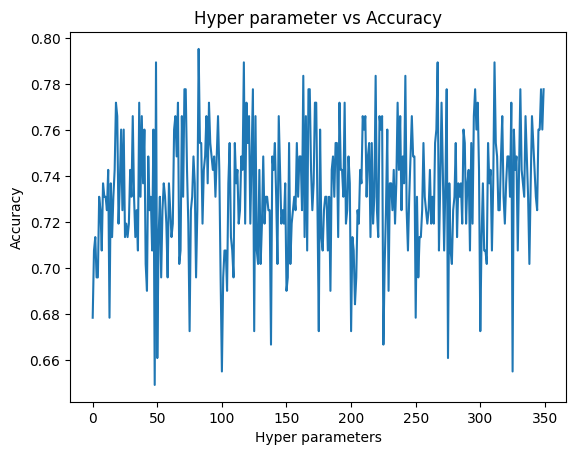

In [ ]:
plt.plot(np.array(accuracy))
plt.title("Hyper parameter vs Accuracy")
plt.xlabel("Hyper parameters")
plt.ylabel("Accuracy")

In [68]:
r_f = random_forest_classifier(n_trees=9, criterion = 'entropy' ,max_depth=5, max_features = 7, random_state=12)
start = time.time()
r_f.fit(X_train_w,Y_train_w)
end = time.time()
predicted_value = r_f.predict(X_valid_w)
acc_r = np.sum(predicted_value==Y_valid_w)/len(X_valid_w)
time_r = end-start
print("Time:",time_r, "Accuracy:",acc_r)


Time: 0.03622269630432129 Accuracy: 0.7426900584795322


In [74]:
print("confusion_matrix")
print(confusion_matrix(predicted_value, Y_valid_w))
print("\nClassification Report of Classifier:\n", classification_report(predicted_value, Y_valid_w))

confusion_matrix
[[57 21]
 [23 70]]

Classification Report of Classifier:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72        78
           1       0.77      0.75      0.76        93

    accuracy                           0.74       171
   macro avg       0.74      0.74      0.74       171
weighted avg       0.74      0.74      0.74       171




Classification Report of Classifier:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72        78
           1       0.77      0.75      0.76        93

    accuracy                           0.74       171
   macro avg       0.74      0.74      0.74       171
weighted avg       0.74      0.74      0.74       171



## 4.2 Adaboost Classifier

2. Compare the results of the best Random Forest with the following Boosted
Decision Trees. Also, experiment with the number of estimators and plot
their training times and accuracies.<br>
• Decision Trees + AdaBoost<br>
• Gradient Boosted Decision Trees


In [84]:
#  Decision Trees + AdaBoost
# This class is use for binary classification only
class adaboost_DT_classification:
  def __init__(self,n_models=10,random_state = None):
    self.alphas = []
    self.models = []
    self.errors = []
    self.n_models = n_models
    self.random_state = random_state

  def fit(self,X,y):
    # np.random.seed(self.random_state)
    for m in range(self.n_models):
        if m==0:
          weights = np.ones(len(y))/len(y)
        else:
          weights = weights * np.exp(alpha_m * (np.not_equal(y, y_pred)).astype(int))

        model = tree.DecisionTreeClassifier(max_depth = 1, random_state= self.random_state)
        model.fit(X, y, sample_weight = weights)
        y_pred = model.predict(X)

        self.models.append(model)
        #error
        error_m = (sum(weights * (np.not_equal(y, y_pred)).astype(int)))/sum(weights)
        # print("error_m",error_m)
        self.errors.append(error_m)
        #alpha
        alpha_m = np.log((1 - error_m) / error_m)
        self.alphas.append(alpha_m)

  def predict(self, X_test):
    preds = np.empty((0,1),float)
    is_preds_empty = True
    for i, model in enumerate(self.models):
      pred =np.array(model.predict(X_test)*self.alphas[i]).reshape(len(X_test),-1)
      if is_preds_empty == True:
        preds = np.append(preds,pred, axis=None)
        is_preds_empty = False
        preds = np.array(preds).reshape(len(preds),-1)
      else:
        preds = np.append(preds, pred, axis = 1)
    preds_sum = np.sum(preds,axis=1)
    return (1 * np.sign(preds_sum)).astype(int)

In [105]:
# convert the labels from {0,1} to {-1,1}
pred = []
for s in Y_train_w:
      if (s==0):
        pred.append(-1)
      else:
        pred.append(1)
Y_train_w_b = np.array(pred)
pred = []
for s in Y_valid_w:
      if (s==0):
        pred.append(-1)
      else:
        pred.append(1)
Y_valid_w_b = np.array(pred)
#train the model and find the accuracy
random_state=15
hyper_param = [10,25,50,75]
accuracy = []
time_r_ = []
for m in hyper_param:
  adab = adaboost_DT_classification(n_models=m,random_state=random_state)
  start = time.time()
  adab.fit(X_train_w, Y_train_w_b)
  end = time.time()
  predicted_value = adab.predict(X_valid_w)
  acc_a = np.sum(predicted_value==Y_valid_w_b)/len(X_valid_w)
  time_a = end-start
  time_r_.append(time_a)
  accuracy.append(acc_a)
max_accuracy_index = np.argmax(accuracy)
time_r = time_r_[max_accuracy_index]
print("Time:",time_r)
print(f"The hyperparameters index for the maximum accuracy = {max_accuracy_index},\nThe hyperparameters for the maximum accuracy = {hyper_param[max_accuracy_index]},\nThe max accuracy = {accuracy[max_accuracy_index]}")
print("\n")

Time: 0.14117169380187988
The hyperparameters index for the maximum accuracy = 3,
The hyperparameters for the maximum accuracy = 75,
The max accuracy = 0.7660818713450293




In [108]:
print("confusion_matrix")
print(confusion_matrix(Y_valid_w,predicted_value,labels = [-1,1]))
print("\nClassification Report of Classifier:\n", classification_report(Y_valid_w,predicted_value))

confusion_matrix
[[ 0  0]
 [15 76]]

Classification Report of Classifier:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00        80
           1       0.75      0.84      0.79        91

    accuracy                           0.44       171
   macro avg       0.25      0.28      0.26       171
weighted avg       0.40      0.44      0.42       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

## 4.3 Gradient Boosted Decision Trees classification

In [99]:
class GradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.estimators = []
        self.e0 = 0

    def fit(self, X, y):
        self.e0 = np.mean(y)
        predictions = self.e0*np.ones(y.shape[0])
        self.models.append(predictions)

        for _ in range(self.n_estimators):
            logits = np.log(predictions / (1 - predictions))

            residuals = y - 1 / (1 + np.exp(-logits))  # Logistic loss gradient
            residuals = (residuals > 0).astype(int)
            # residuals = y - self.models[-1]
            tree_ = tree.DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_leaf=2,min_samples_split=2)
            tree_.fit(X, residuals)
            self.estimators.append(tree_)
            self.models.append(self.models[-1] + self.learning_rate * tree_.predict(X))

    def predict(self, X):
      d = []
      d.append(self.e0*np.ones(len(X))
)
      for model in self.estimators:
        d.append(self.learning_rate * model.predict(X))
      c = sum(d)
      return np.where(1 / (1 + np.exp(-np.array(c))) >= 0, 1, -1)


In [103]:
pred = []
for s in Y_train_w:
      if (s==0):
        pred.append(-1)
      else:
        pred.append(1)
Y_train_w_b = np.array(pred)
pred = []
for s in Y_valid_w:
      if (s==0):
        pred.append(-1)
      else:
        pred.append(1)
Y_valid_w_b = np.array(pred)
random_state=15
hyper_param = [25,50,75,100,10] #No of models
accuracy = []
time_g_ = []
for m in hyper_param:
  gbdt_classifier = GradientBoostingClassifier(n_estimators=m, learning_rate=0.2)
  start = time.time()
  gbdt_classifier.fit(X_train_w, np.array(Y_train_w).reshape(len(Y_train_w),))
  end = time.time()
  # Make predictions on the test set
  predicted_value = gbdt_classifier.predict(X_valid_w)
  acc_g = np.sum(predicted_value==np.array(Y_valid_w).reshape(len(Y_valid_w),))/len(X_valid_w)
  time_g = end-start
  accuracy.append(acc_g)
  time_g_.append(time_g)
max_accuracy_index = np.argmax(accuracy)
time_g = time_g_[max_accuracy_index]
print("Time:",time_g)
print(f"The hyperparameters index for the maximum accuracy = {max_accuracy_index},\nThe hyperparameters for the maximum accuracy = {hyper_param[max_accuracy_index]},\nThe max accuracy = {accuracy[max_accuracy_index]}")
print("\n")

Time: 0.09588932991027832
The hyperparameters index for the maximum accuracy = 0,
The hyperparameters for the maximum accuracy = 25,
The max accuracy = 0.5321637426900585




In [104]:
print("confusion_matrix")
print(confusion_matrix(predicted_value, Y_valid_w))
print("\nClassification Report of Classifier:\n", classification_report(predicted_value, Y_valid_w))

confusion_matrix
[[ 0  0]
 [80 91]]

Classification Report of Classifier:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.69       171

    accuracy                           0.53       171
   macro avg       0.50      0.27      0.35       171
weighted avg       1.00      0.53      0.69       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


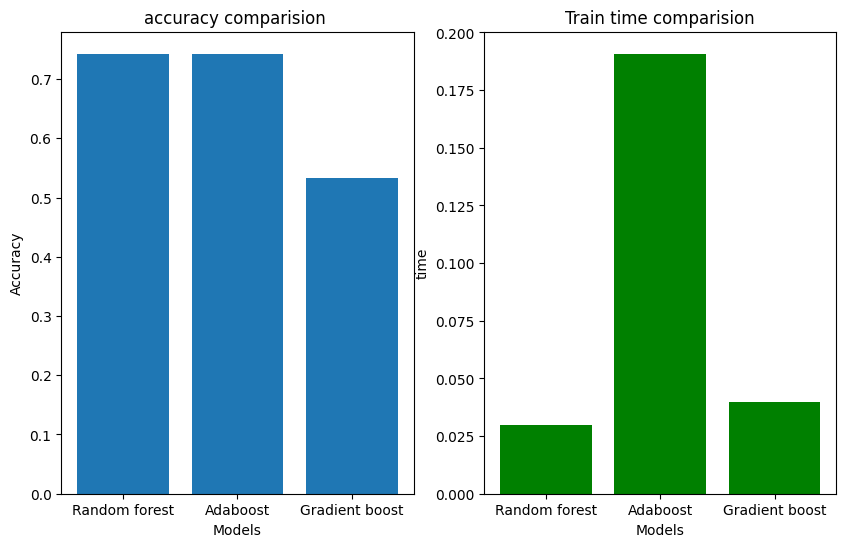

In [53]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['Random forest','Adaboost','Gradient boost'],[acc_r,acc_a,acc_g])
plt.title('accuracy comparision ')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(['Random forest','Adaboost','Gradient boost'],[time_r, time_a, time_g], color='green')
plt.title('Train time comparision')
plt.xlabel('Models')
plt.ylabel('time')
plt.show()

## Housing Dataset preprocessing

In [54]:
X_data_m = pd.read_csv('/content/drive/MyDrive/SMAI_Google colab/HousingData.csv')
print("The shape of the data:",X_data_m.shape)
print(X_data_m.columns)
#Nan value replaced by mean of the feature
for i in X_data_m.columns:
    X_data_m[i].fillna(X_data_m[i].mean(), inplace=True)
X_data_m

The shape of the data: (506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


Text(0, 0.5, 'Count')

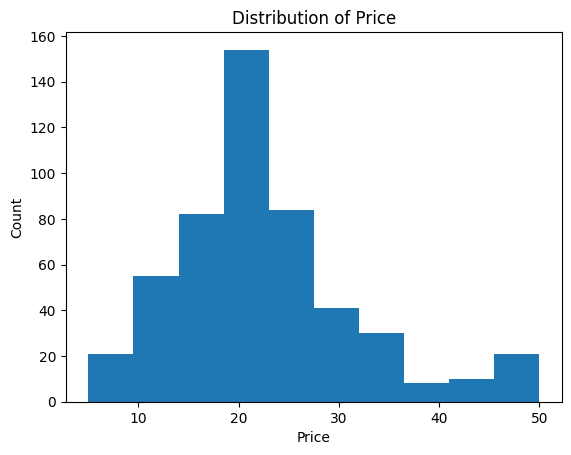

In [44]:
X_data_m["MEDV"].sort_index().plot(kind='hist')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')

In [55]:
Y_data_h = X_data_m['MEDV']
X_data_h_n = X_data_m.drop('MEDV',axis=1)

# X_data_h_n = preprocessing.normalize(X_data_h_n,axis=0)
# std = preprocessing.StandardScaler()
# X_data_w_n = std.fit_transform(X=X_data_h_n)

X_train_t, X_test_h, Y_train_t, Y_test_h = train_test_split(X_data_h_n,Y_data_h,test_size=0.15,random_state=1)
X_train_h, X_valid_h,Y_train_h, Y_valid_h = train_test_split(X_train_t,Y_train_t,test_size=0.176,random_state=1)

std = preprocessing.StandardScaler()
X_train_h = std.fit_transform(X=X_train_h)
X_test_h = std.fit_transform(X=X_test_h)
X_valid_h = std.fit_transform(X=X_valid_h)
print("Shape of the train, test and validaton data:",X_train_h.shape,X_test_h.shape,X_valid_h.shape)
print("Shape of the train, test and validaton label:",Y_train_h.shape,Y_test_h.shape,Y_valid_h.shape)

Shape of the train, test and validaton data: (354, 13) (76, 13) (76, 13)
Shape of the train, test and validaton label: (354,) (76,) (76,)


## 4.1 Random Forest Regresor Tranning

In [56]:
class random_forest_Regresor:
  def __init__(self, n_trees=10, criterion = 'gini',max_depth=10, max_features = 10, min_samples_split=2,random_state=None):
    self.n_trees = n_trees
    self.criterion = criterion
    self.max_depth=max_depth
    self.max_features = max_features
    self.min_samples_split=min_samples_split
    self.random_state = random_state
    self.trees = []

  def fit(self,X,y):
    self.trees = []
    for i in range(self.n_trees):
        tree_ = tree.DecisionTreeRegressor(criterion=self.criterion, max_depth=self.max_depth,
                                           max_features=self.max_features, min_samples_split=self.min_samples_split,
                                           random_state=self.random_state)

        indices = np.random.choice(len(X), size=len(X), replace=True)
        tree_.fit(X[indices], y[indices])
        self.trees.append(tree_)


  def predict(self,X_test):
    test_preds = np.empty((0,1),float)
    pred_is_empty = True
    for tree in self.trees:
      if pred_is_empty == True:
        test_preds = np.append(test_preds,tree.predict(X_test),axis=None)
        pred_is_empty = False
        test_preds = np.array(test_preds).reshape(len(test_preds),-1)
      else:
        test_preds = np.append(test_preds,np.array(tree.predict(X_test)).reshape(len(X_test),-1),axis=1)
    test_preds_sum = np.mean(test_preds,axis=1)
    return np.array(test_preds_sum).reshape(len(test_preds_sum),-1)



In [57]:
random_state = 12
h_param = {
        'n_trees':[7,9,11,13,15,17,19],
        'criterion' : ['squared_error', 'absolute_error'],
        'Max_depth' : [3,5,10,20,30],
        'Max_features' : [3,5,7,9,11]
        }
hyper_param = list(product(*h_param.values()))
MSE_n = []
for i in hyper_param:
  r_f = random_forest_Regresor(n_trees=i[0], criterion = i[1] ,max_depth=i[2], max_features = i[3], random_state=random_state)
  r_f.fit(X_train_h,np.array(Y_train_h).reshape(len(Y_train_h),-1))
  predicted_value = r_f.predict(X_valid_h)
  MSE = mean_squared_error(np.array(Y_valid_h).reshape(len(Y_valid_h),-1), predicted_value)
  MSE_n.append(MSE)
min_MSE_index = np.argmin(MSE_n)
print(f"The hyperparameters index for the minimum MSE = {min_MSE_index},\nThe hyperparameters for the minimum MSE = {hyper_param[min_MSE_index]},\nThe minimum MSE = {MSE_n[min_MSE_index]}")


The hyperparameters index for the minimum MSE = 262,
The hyperparameters for the minimum MSE = (17, 'squared_error', 10, 7),
The minimum MSE = 9.341957788474005


Text(0, 0.5, 'MSE')

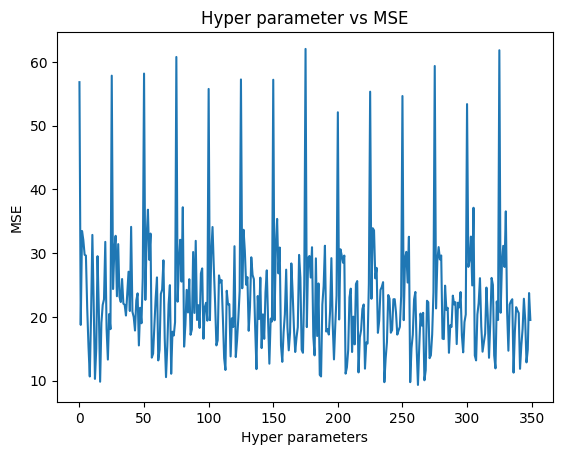

In [58]:
plt.plot(np.array(MSE_n))
plt.title("Hyper parameter vs MSE")
plt.xlabel("Hyper parameters")
plt.ylabel("MSE")

In [118]:
r_f = random_forest_Regresor(n_trees=9, criterion = 'absolute_error' ,max_depth=30, max_features = 5, random_state=12)
start = time.time()
r_f.fit(X_train_h,np.array(Y_train_h).reshape(len(Y_train_h),-1))
end = time.time()
predicted_value = r_f.predict(X_valid_h)
MSE_r = mean_squared_error(np.array(Y_valid_h).reshape(len(Y_valid_h),-1), predicted_value)
time_r = end-start
print("Time:",time_r, "MSE:",MSE_r)


Time: 0.1259617805480957 MSE: 18.826255685510063


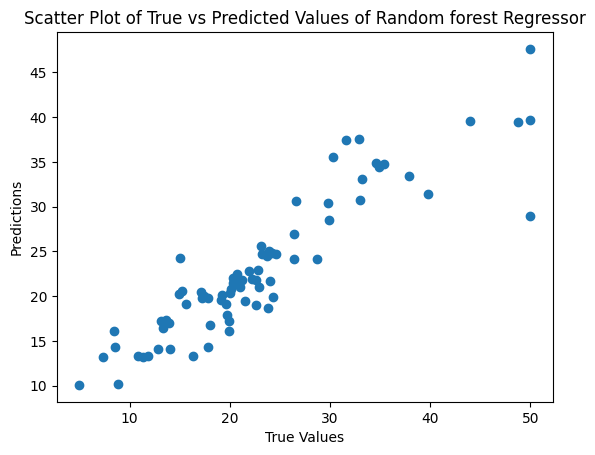

In [119]:

plt.scatter(np.array(Y_valid_h).reshape(len(Y_valid_h),), predicted_value)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Scatter Plot of True vs Predicted Values of Random forest Regressor")
plt.show()

## 4.2 Adaboost Regressor

In [115]:
#  Decision Trees + AdaBoost
# This class is use for regression
class adaboost_DT_Regressor:
  def __init__(self,n_models=10,random_state = None):
    self.alphas = []
    self.models = []
    self.errors = []
    self.n_models = n_models
    self.random_state = random_state

  def fit(self,X,y):
    # np.random.seed(self.random_state)
    for m in range(self.n_models):
        if m==0:
          weights = np.ones(len(y))/len(y)
        else:
          weights = weights * np.exp(alpha_m * (np.not_equal(y, y_pred)).astype(int))
        # print("weights",weights.shape)
        model = tree.DecisionTreeRegressor(max_depth = 15, random_state= self.random_state)
        model.fit(X, y, sample_weight = weights)
        y_pred = model.predict(X)

        self.models.append(model)
        #error
        error_m = (sum(weights * (np.not_equal(y, y_pred)).astype(int)))/sum(weights)
        # print("error_m",error_m)
        self.errors.append(error_m)
        #alpha
        alpha_m = np.log((1 - error_m) / max(0.000000001,error_m))
        self.alphas.append(alpha_m)

  def predict(self, X_test):
    preds = np.empty((0,1),float)
    is_preds_empty = True
    for i, model in enumerate(self.models):
      pred =np.array(model.predict(X_test)*self.alphas[i]).reshape(len(X_test),-1)
      if is_preds_empty == True:
        preds = np.append(preds,pred, axis=None)
        is_preds_empty = False
        preds = np.array(preds).reshape(len(preds),-1)
      else:
        preds = np.append(preds, pred, axis = 1)
    preds_mean = np.mean(preds,axis=1)
    return np.array(preds_mean).reshape(len(preds_mean),-1)

In [116]:

#train the model and find the accuracy
random_state=15
n_models = 5
adab = adaboost_DT_Regressor(n_models=n_models,random_state=random_state)
start = time.time()
adab.fit(X_train_h, Y_train_h)
end = time.time()
predicted_value = adab.predict(X_valid_h)
MSE_a = mean_squared_error(np.array(Y_valid_h).reshape(len(Y_valid_h),-1),predicted_value)
time_a = end-start
print("Time:",time_a, "MSE:",MSE_a)

Time: 0.04525184631347656 MSE: 35.137988918131036


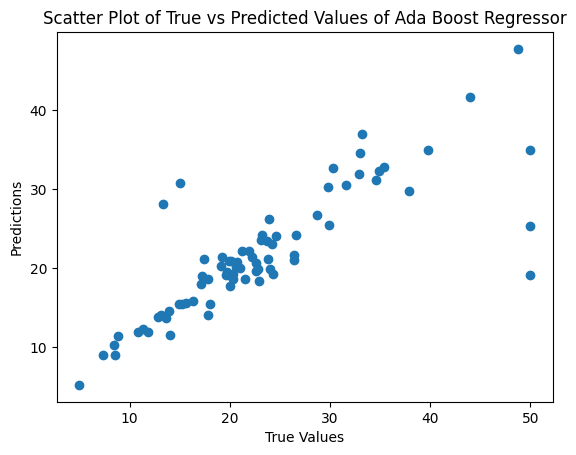

In [117]:
plt.scatter(np.array(Y_valid_h).reshape(len(Y_valid_h),), predicted_value)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Scatter Plot of True vs Predicted Values of Ada Boost Regressor")
plt.show()

## Gradient Boosted Decision Trees Regressor

In [124]:
class GradientBoostTreeRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.estimators = []
        self.e0 = 0

    def fit(self, X, y):
        self.e0 = np.mean(y)
        predictions = self.e0*np.ones(y.shape[0])
        self.models.append(predictions)

        for _ in range(self.n_estimators):
            residuals = y - self.models[-1]
            tree_ = tree.DecisionTreeRegressor(criterion='absolute_error', max_depth=5,min_samples_leaf=2,min_samples_split=2)
            tree_.fit(X, residuals)
            self.estimators.append(tree_)
            self.models.append(self.models[-1] + self.learning_rate * tree_.predict(X))

    def predict(self, X):
      d = []
      d.append(self.e0*np.ones(len(X))
)
      for model in self.estimators:
        d.append(self.learning_rate * model.predict(X))
      c = sum(d)
      return c
rgr = GradientBoostTreeRegressor(n_estimators=10)
start = time.time()
rgr.fit(X_train_h,Y_train_h)
end = time.time()
predicted_value = rgr.predict(X_valid_h)
MSE_g = mean_squared_error(np.array(Y_valid_h).reshape(len(Y_valid_h),-1),predicted_value)
time_g= end-start
print("Time:",time_g, "MSE:",MSE_g)

Time: 0.14199018478393555 MSE: 35.28094283290555


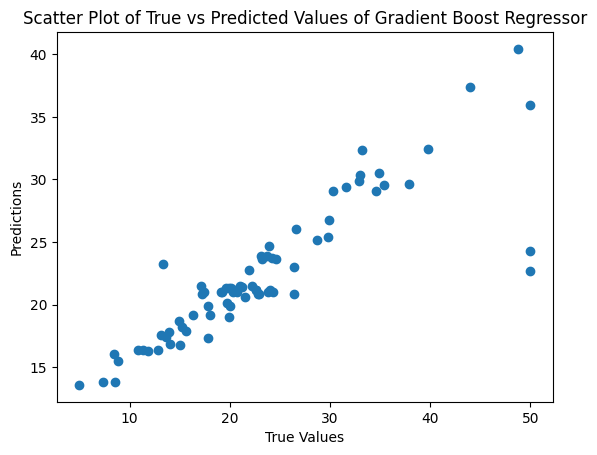

In [125]:
plt.scatter(np.array(Y_valid_h).reshape(len(Y_valid_h),), predicted_value)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Scatter Plot of True vs Predicted Values of Gradient Boost Regressor")
plt.show()

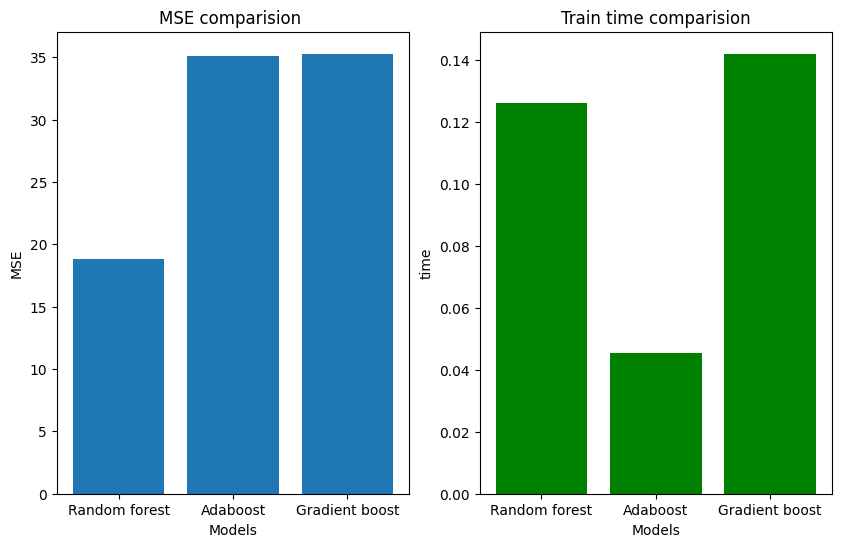

In [126]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['Random forest','Adaboost','Gradient boost'],[MSE_r,MSE_a,MSE_g])
plt.title('MSE comparision ')
plt.xlabel('Models')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(['Random forest','Adaboost','Gradient boost'],[time_r, time_a, time_g], color='green')
plt.title('Train time comparision')
plt.xlabel('Models')
plt.ylabel('time')
plt.show()

3. Provide an analysis of the mistakes of these models and try to explore and
explain the feature similarity of the common mistakes